<h1><center>Advanced Regression Assignment: Housing Price Prediction</center></h1>

**Business Objective:** A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The objective is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**Evaluation Metric**: The Evaluation metric is a combination of RMSE Score, MAPE and R2 Score

## Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import  is_object_dtype, is_numeric_dtype
from sklearn.pipeline import Pipeline
from collections import OrderedDict
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold

from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

---

## Reading the Data

In [6]:
data = pd.read_csv("data/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.drop(columns = ['Id'], inplace = True)

### Initial Look at the Data

In [4]:
print(f"Shape of the Data: {data.shape}")

Shape of the Data: (1460, 80)


In [5]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Missing Values and Scrap values (infinity values)

In [6]:
df_na = pd.DataFrame(np.round(data.isna().sum()/data.shape[0] * 100, 2)).reset_index()
df_na.rename(columns = {'index': 'Columns', 0: 'Missing Value Percentage'}, inplace =True)
df_na = df_na.sort_values(by = ['Missing Value Percentage'], ascending = False)
df_na.head(20)

,Columns,Missing Value Percentage
71,PoolQC,99.52
73,MiscFeature,96.30
5,Alley,93.77
72,Fence,80.75
56,FireplaceQu,47.26
2,LotFrontage,17.74
58,GarageYrBlt,5.55
63,GarageCond,5.55
57,GarageType,5.55
59,GarageFinish,5.55


In [7]:
print("Checking for presence of infinite values in data")
print(f"{data.isin([np.inf, -np.inf]).any().sum()} records with infinite values")

Checking for presence of infinite values in data
0 records with infinite values


---
---

## Handling Missing Values (Categorical Features)

In [8]:
list_missing_categorical = []
for column in data.columns:
    if is_object_dtype(data[column]) and data[column].isna().any():
        list_missing_categorical.append(column)
        print("---------------------------------")
        print(column)
        print("---------------------------------")
        print(data[column].value_counts(dropna = False))

print(f"Total {len(list_missing_categorical)} categorical columns have NA values which may not be missing data, but absence of the particular attribute")

---------------------------------
Alley
---------------------------------
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
---------------------------------
MasVnrType
---------------------------------
None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64
---------------------------------
BsmtQual
---------------------------------
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64
---------------------------------
BsmtCond
---------------------------------
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64
---------------------------------
BsmtExposure
---------------------------------
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64
---------------------------------
BsmtFinType1
---------------------------------
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dt

---

## Inference


Among all these categorical variables containing NA values, only the column "Electrical" has NA values which actually refer to missing data (definition for NA not present in data dictionary).
So we can fill the missing value using mode imputation as it has only 1 missing value.

For the rest of the columns, we fill the missing values as "Not Present In Property"

In [9]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [10]:
for column in list_missing_categorical:
    data[column] = data[column].fillna("Not Present In Property")

---
---

## Handling Missing Values (Numerical Columns)

In [11]:
df_na[(df_na['Columns'].isin([x for x in data.columns if is_numeric_dtype(data[x])]))&
     (df_na['Missing Value Percentage']>0)]

,Columns,Missing Value Percentage
2,LotFrontage,17.74
58,GarageYrBlt,5.55
25,MasVnrArea,0.55


---

### Inference

- LotFrontage is Missing at random and can be replaced by the median value of the entire distribution
- GarageYrBlt is Missing not at random, instead, it's NA because of absence of garage in the property, so we will replace the missing values by the corresponding YrSold so that while creating engineered features, the value of the feature(s) is 0 and it doesn't affect the corresponding model coefficients

- MasVnrArea has a very small percentage of missing values and can be filled using the median value

In [12]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['YrSold'])


---
---

## Exploratory Data Analysis

### Engineering New Columns

In [13]:
data['property_age'] = data['YrSold'] - data['YearBuilt']
data['property_age_remodel'] =  data['YrSold'] - data['YearRemodAdd']
data['garage_age'] = data['YrSold'] - data['GarageYrBlt']
data.drop(columns = ['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], inplace = True)
data.shape

(1460, 79)

### Dividing the Variables into Groups

In [14]:
numeric_cols = [x for x in data.columns if is_numeric_dtype(data[x])]
categorical_cols = [x for x in data.columns if is_object_dtype(data[x])]


### Analysing Numerical Variables

In [15]:
len(numeric_cols)

36

In [20]:
def plot_boxplots(data, nrows, ncols, columns_list, figsize = (30,30)):
    """Function for plotting side by side bar plot for categorical columns
    and twin axis pointplot of Dependent variable
    
    :params:
    
    data: pandas DataFrame
    nrows: number of rows in the matplotlib subplot
    ncols: number of columns in the matplotlib subplot
    columns_list: List of categorical columns
    figsize: Matplotlib Subplot figure size
    
    nrows and ncols are dependent on the numer of columns present in the
    columns list
    """
    data = data.copy()
    data
    fig, ax = plt.subplots(nrows, ncols, figsize = figsize)
    i = 0
    j = 0
    for column in columns_list:
        try:
            sns.boxplot(data = data, x = column, ax = ax[i,j])
            plt.grid()
            plt.title(f"Count Barplot Plot vs. Sale Price: {column}")
            j += 1
            if j > ncols-1:
                i += 1
                j = 0
            if i >nrows-1 and j>ncols-1:
                break
        except Exception as e:
            print(e)
            continue
    plt.show()

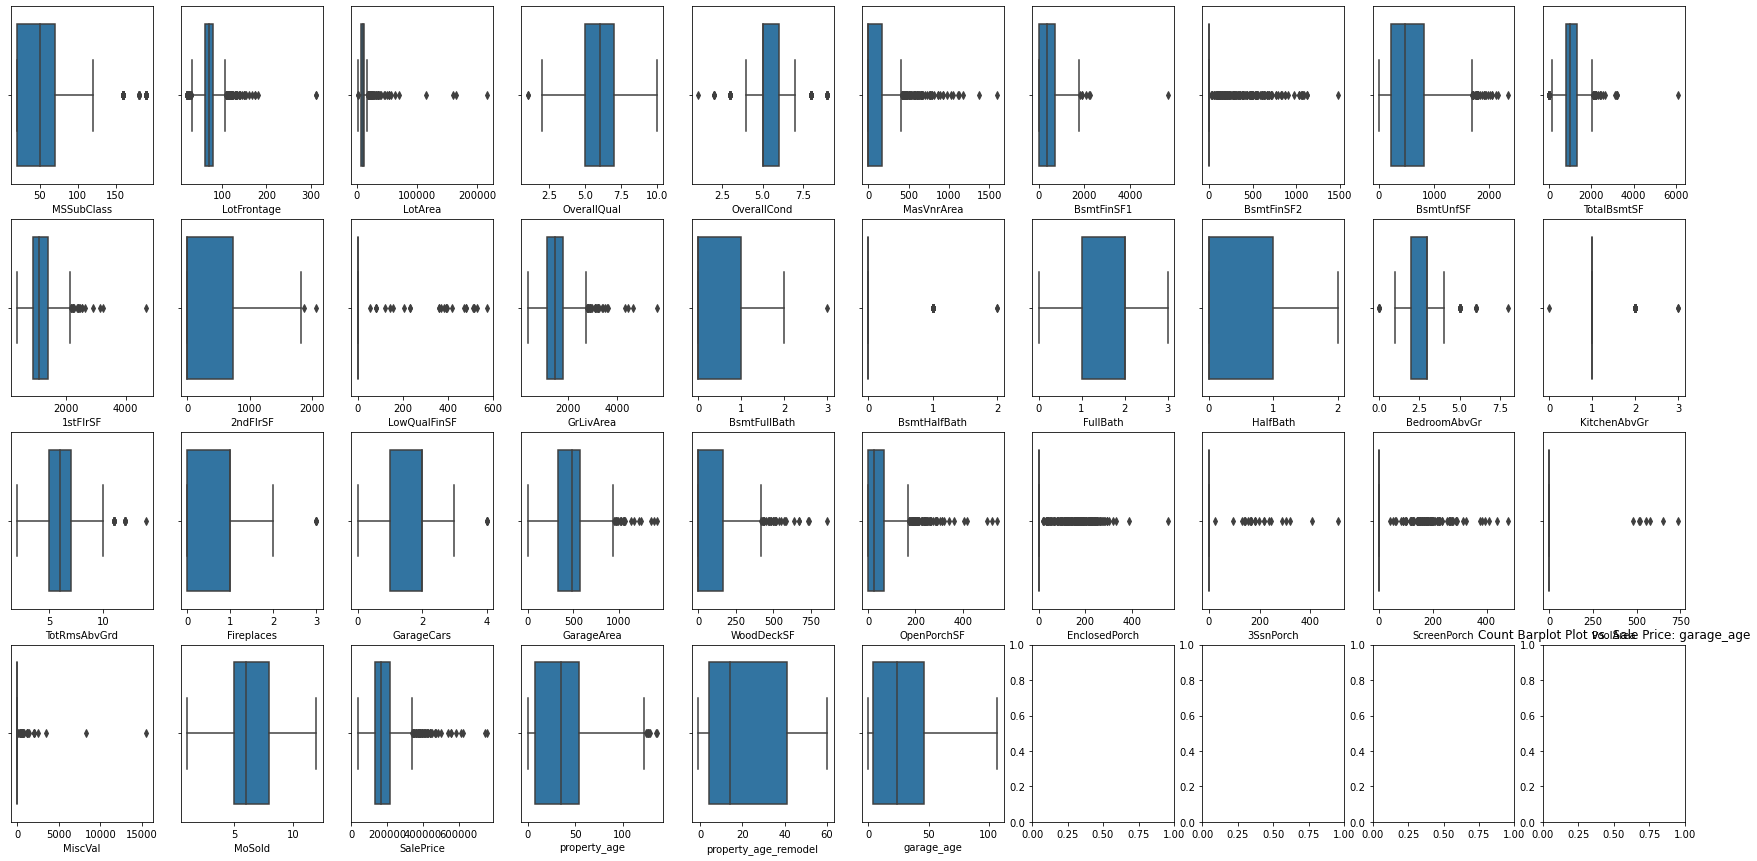

In [21]:
plot_boxplots(data, 4, 10, numeric_cols, figsize = (30,15))

### Inference

- There is presence of outliers or extreme values for multiple columns, presence of these values may or maynot affect the training process and the coefficients.
- First step will be to run the modelling without removing any rows as outliers
- Based on the performance of first step, next step will be removal of outlier rows based on soft filter (not removing too many rows)

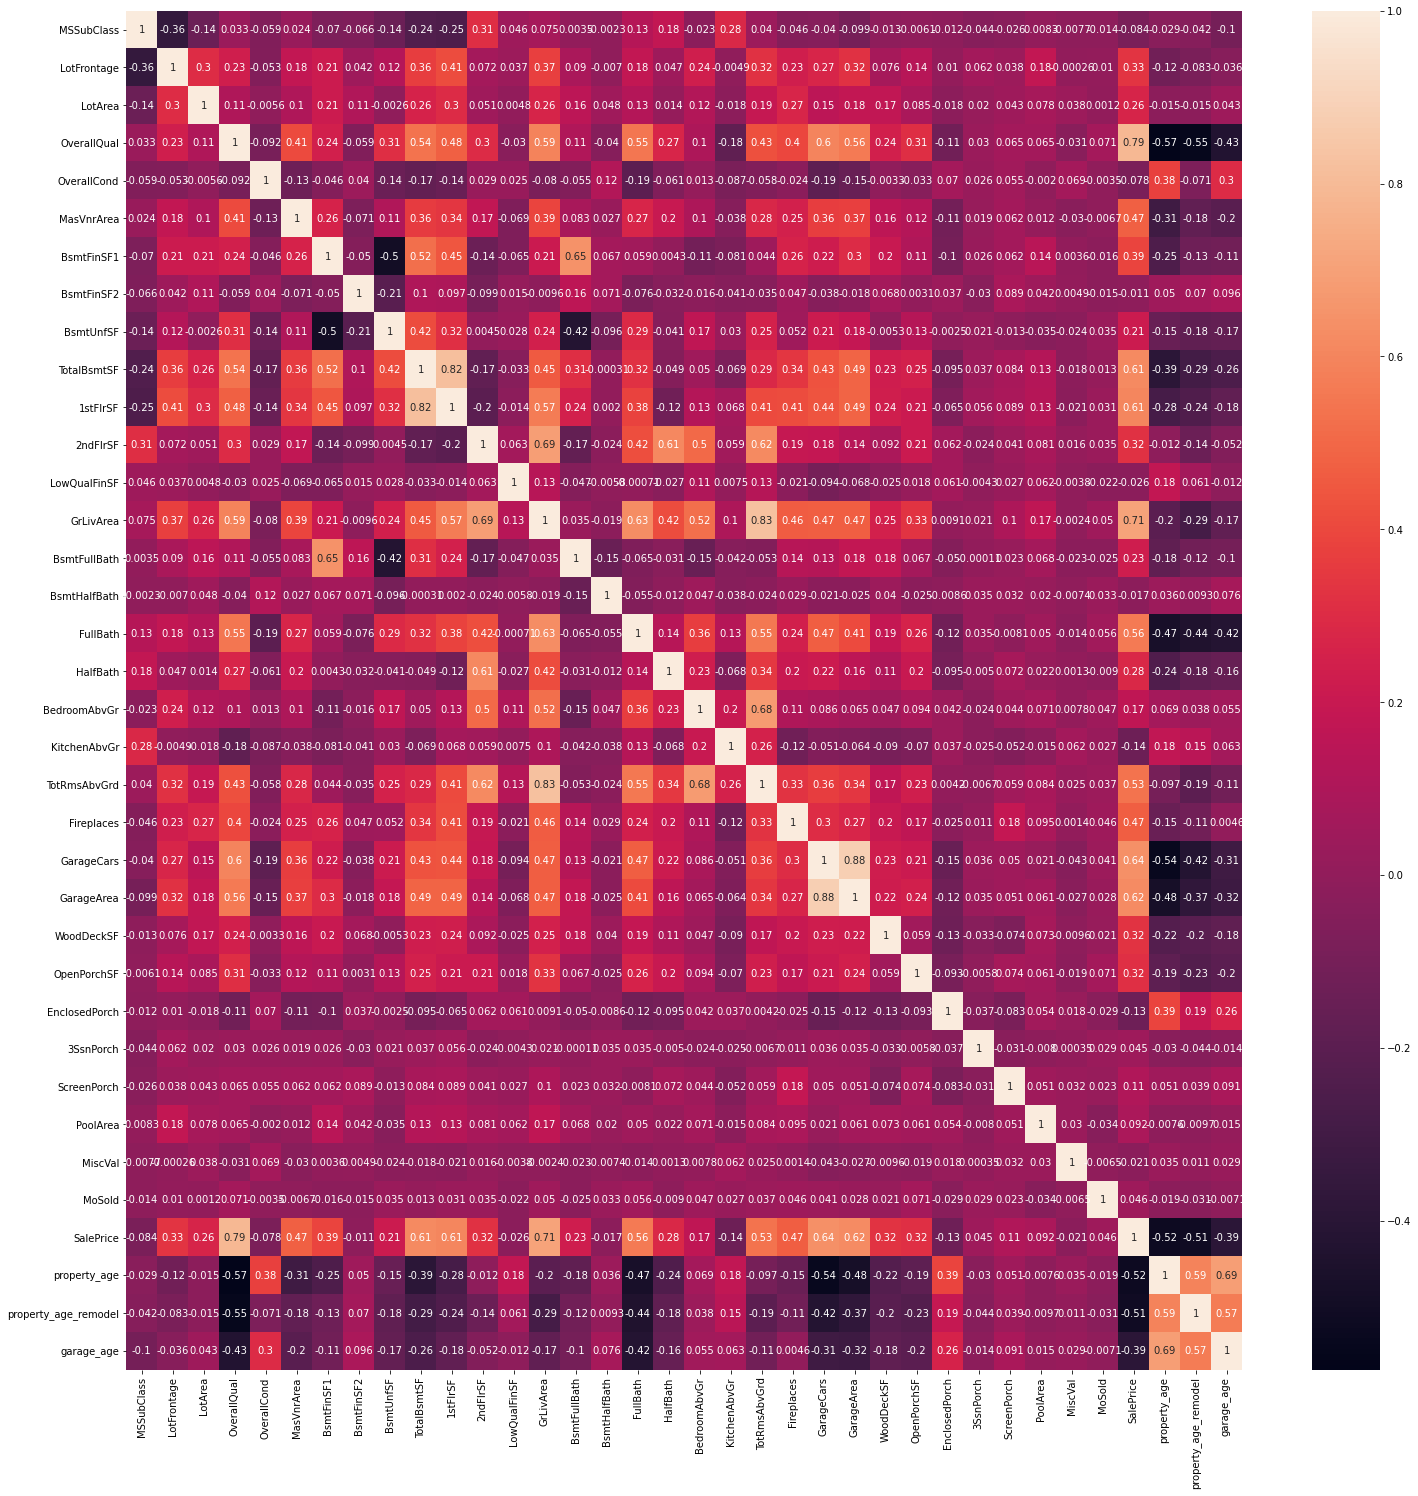

In [24]:
plt.figure(figsize = (25, 25))
sns.heatmap(data[numeric_cols].corr(),annot = True)
plt.show()

#### Listing Columns having low correlation with target variable (-0.1, 0.1)

In [25]:
low_correlation_cols = []
dict_ =  data[numeric_cols].corr()['SalePrice']
for k,v in dict_.items():
    if np.abs(v)< 0.1:
        low_correlation_cols.append(k)
print(f"Total {len(low_correlation_cols)} columns having low correlation with SalesPrice")

Total 9 columns having low correlation with SalesPrice


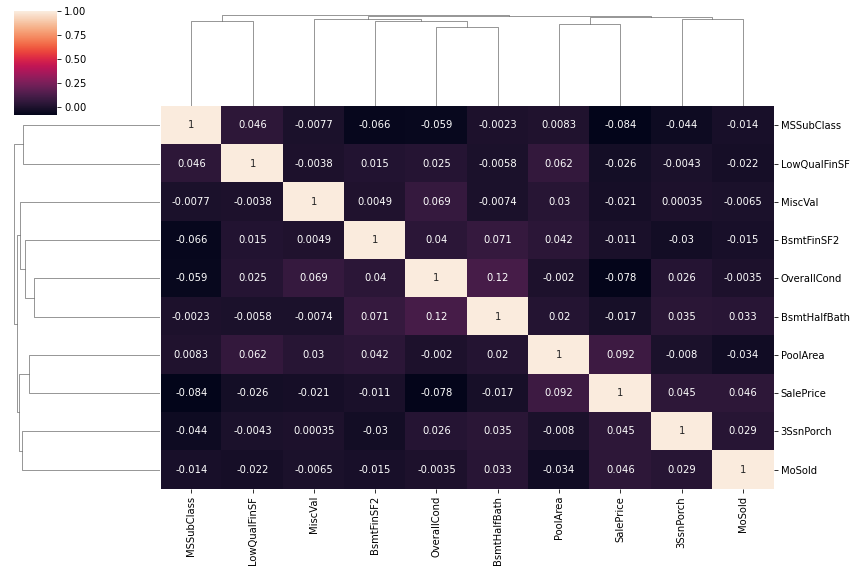

In [26]:
sns.clustermap(data[low_correlation_cols + ['SalePrice']].corr(),annot = True, figsize = (12, 8))
plt.show()

## Identifying Direct Multicollinearity

In [27]:
#Identifying Columns which have multicollinearity (Correlation Coefficient between independent variables greater than 0.6 or less than -0.6)
for column in [x for x in numeric_cols if x!= 'SalePrice']:
    dict_ =  data[[x for x in numeric_cols if x!= 'SalePrice']].corr()[column]
    high_corr_cols = []
    for k,v in dict_.items():
        if np.abs(v)> 0.55 and k!= column:
            
            high_corr_cols.append(k)
    if high_corr_cols != []:
        print(f"{column} has direct multicollinearity with {high_corr_cols}")
    

OverallQual has direct multicollinearity with ['GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'property_age', 'property_age_remodel']
BsmtFinSF1 has direct multicollinearity with ['BsmtFullBath']
TotalBsmtSF has direct multicollinearity with ['1stFlrSF']
1stFlrSF has direct multicollinearity with ['TotalBsmtSF', 'GrLivArea']
2ndFlrSF has direct multicollinearity with ['GrLivArea', 'HalfBath', 'TotRmsAbvGrd']
GrLivArea has direct multicollinearity with ['OverallQual', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd']
BsmtFullBath has direct multicollinearity with ['BsmtFinSF1']
FullBath has direct multicollinearity with ['OverallQual', 'GrLivArea', 'TotRmsAbvGrd']
HalfBath has direct multicollinearity with ['2ndFlrSF']
BedroomAbvGr has direct multicollinearity with ['TotRmsAbvGrd']
TotRmsAbvGrd has direct multicollinearity with ['2ndFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr']
GarageCars has direct multicollinearity with ['OverallQual', 'GarageArea']
GarageArea has direct mu

In [28]:
## Based on These Insights we drop the following columns which may not be that much important from business perspective as opposed to their corresponding multicollinear column(s)

multicollinear_cols = ['GarageCars', 'BsmtFullBath', 'TotalBsmtSF', 'TotRmsAbvGrd', 'HalfBath', 'GrLivArea', 'garage_age', 'BedroomAbvGr', 'property_age_remodel']

#### Identifying Columns with Very Low Variance (Columns where only a single value occurs for more than 80% of the records)

In [29]:
low_variance_cols = []
for column in numeric_cols:
    try:
        if np.round(data[column].value_counts().values[0]/data.shape[0] * 100, 2) > 80:
            low_variance_cols.append(column)
    except:
        print(f"{column} ------- threw exception")
print(low_variance_cols)

['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [30]:
irrelevant_cols = list(set(low_variance_cols+low_correlation_cols+multicollinear_cols))
print(len(irrelevant_cols))

21


In [31]:
for val in irrelevant_cols:
    numeric_cols.remove(val)
print(len(numeric_cols))

15


In [32]:
data = data.drop(columns = irrelevant_cols, errors = 'ignore')
data.shape

(1460, 58)

## Analysing Categorical Columns

---
---

### Identifying and Removing Columns with low variance (columns where one category is present for more than 85% of the records)

In [33]:
irrelevant_categorical_cols = []
for column in categorical_cols:
    try:
        if np.round(data[column].value_counts().values[0]/data.shape[0] * 100, 2) > 85:
            irrelevant_categorical_cols.append(column)
    except:
        print(f"{column} ------- threw exception")

In [34]:
len(irrelevant_categorical_cols)

21

In [35]:
for col in irrelevant_categorical_cols:
    categorical_cols.remove(col)

In [36]:
data.drop(columns = irrelevant_categorical_cols, inplace = True)
data.shape

(1460, 37)

---

### Dividing The Categorical Columns into further Ordinal And Nominal Columns

Based on the Data Dictionary, all ordinal columns (except for bsmtExposure), which have an inherent ranking or order within them are the columns which describe the quality or condition of the property parameter, and contain the levels "Ex" (Excellent), "Gd" (Good), "TA" (Typical) etc. 


So the categorical columns have been further divided into nominal and ordinal columns based on whether the column contains these levels or not.
BsmtExposure contains values 'Gd', 'Av', 'Mn', 'No' etc.

In [37]:
ordinal_cols = [x for x in categorical_cols if set(data[x].values).intersection(set(['Gd', 'TA', 'Ex', 'Po'])) != set()]
nominal_cols = list(set(categorical_cols).difference(set(ordinal_cols)))

In [38]:
def plot_categorical_columns(data, nrows, ncols, columns_list, figsize = (30,30)):
    """Function for plotting side by side bar plot for categorical columns
    and twin axis pointplot of Dependent variable
    
    :params:
    
    data: pandas DataFrame
    nrows: number of rows in the matplotlib subplot
    ncols: number of columns in the matplotlib subplot
    columns_list: List of categorical columns
    figsize: Matplotlib Subplot figure size
    
    nrows and ncols are dependent on the numer of columns present in the
    columns list
    
    """
    data = data.copy()
    data
    fig, ax = plt.subplots(nrows, ncols, figsize = figsize)
    i = 0
    j = 0
    for column in columns_list:
        try:
            data_gr = data.groupby([column], as_index = False).agg({'SalePrice': ['count','median']})
            data_gr.columns = ["_".join(x).rstrip("_") for x in data_gr.columns.ravel()]
            sns.barplot(data = data_gr, x = column, y = f"SalePrice_count", ax = ax[i,j])
            ax2 = ax[i,j].twinx()

            sns.pointplot(data = data_gr, x = column, y = 'SalePrice_median', ax = ax2)
            plt.grid()
            plt.title(f"Count Barplot Plot vs. Sale Price: {column}")

            j += 1
            if j > ncols-1:
                i += 1
                j = 0
            if i >nrows-1 and j>ncols-1:
                break
        except Exception as e:
            print(e)
            continue
    plt.show()

### Visualising Ordinal Columns

---

In [39]:
len(ordinal_cols)

6

The categories in a categorical column are by default sorted alphabetically. So, we need to assign them as 'Category' dtype and provide custom order (with "Not Present in Property" as lowest and "Ex" as highest)

In [41]:
#Custom Assigning Category Order

for column in [x for x in ordinal_cols if x != 'BsmtExposure']:
    try:
        data[column] = pd.Categorical(data[column], ['Not Present In Property', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
    except Exception as e:
        print(e)
        continue
        
data['BsmtExposure'] = pd.Categorical(data["BsmtExposure"], ['Not Present In Property', 'No', 'Mn', 'Av', 'Gd'])

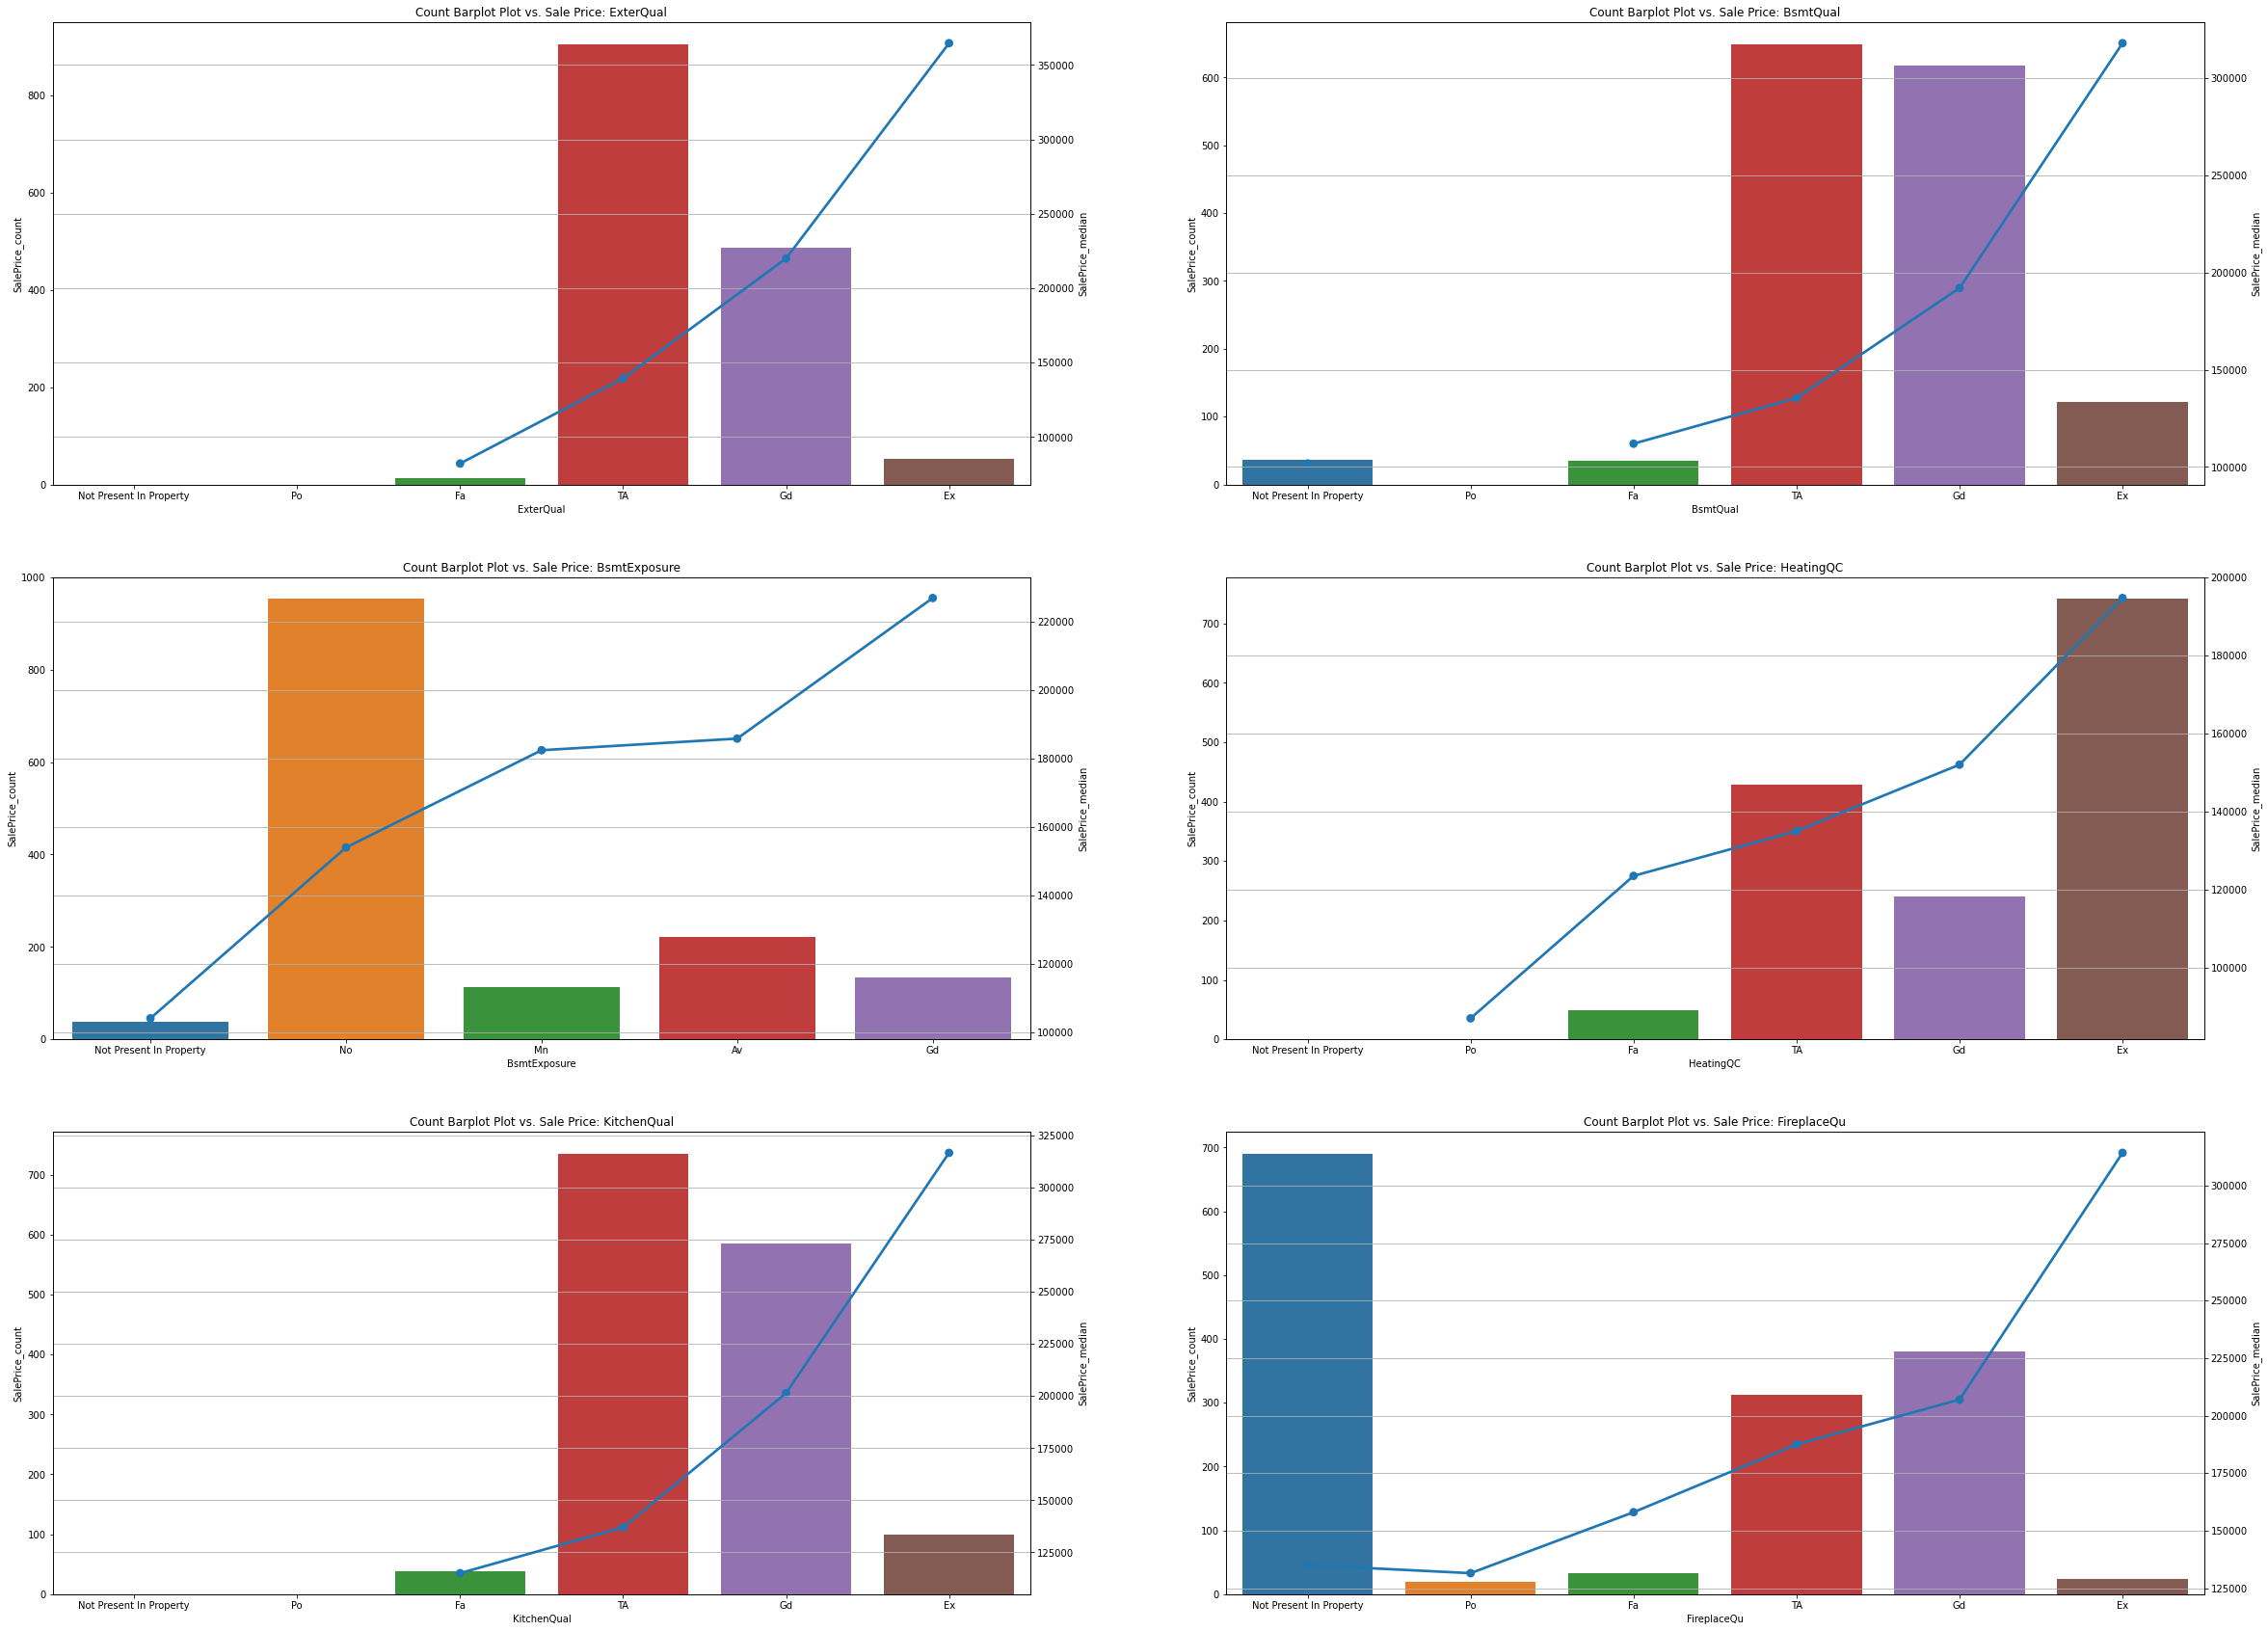

In [42]:
import warnings
warnings.simplefilter("ignore")
plot_categorical_columns(data, 3, 2, ordinal_cols, figsize = (40,30))

---

### Visualising Nominal Columns

In [43]:
len(nominal_cols)

16

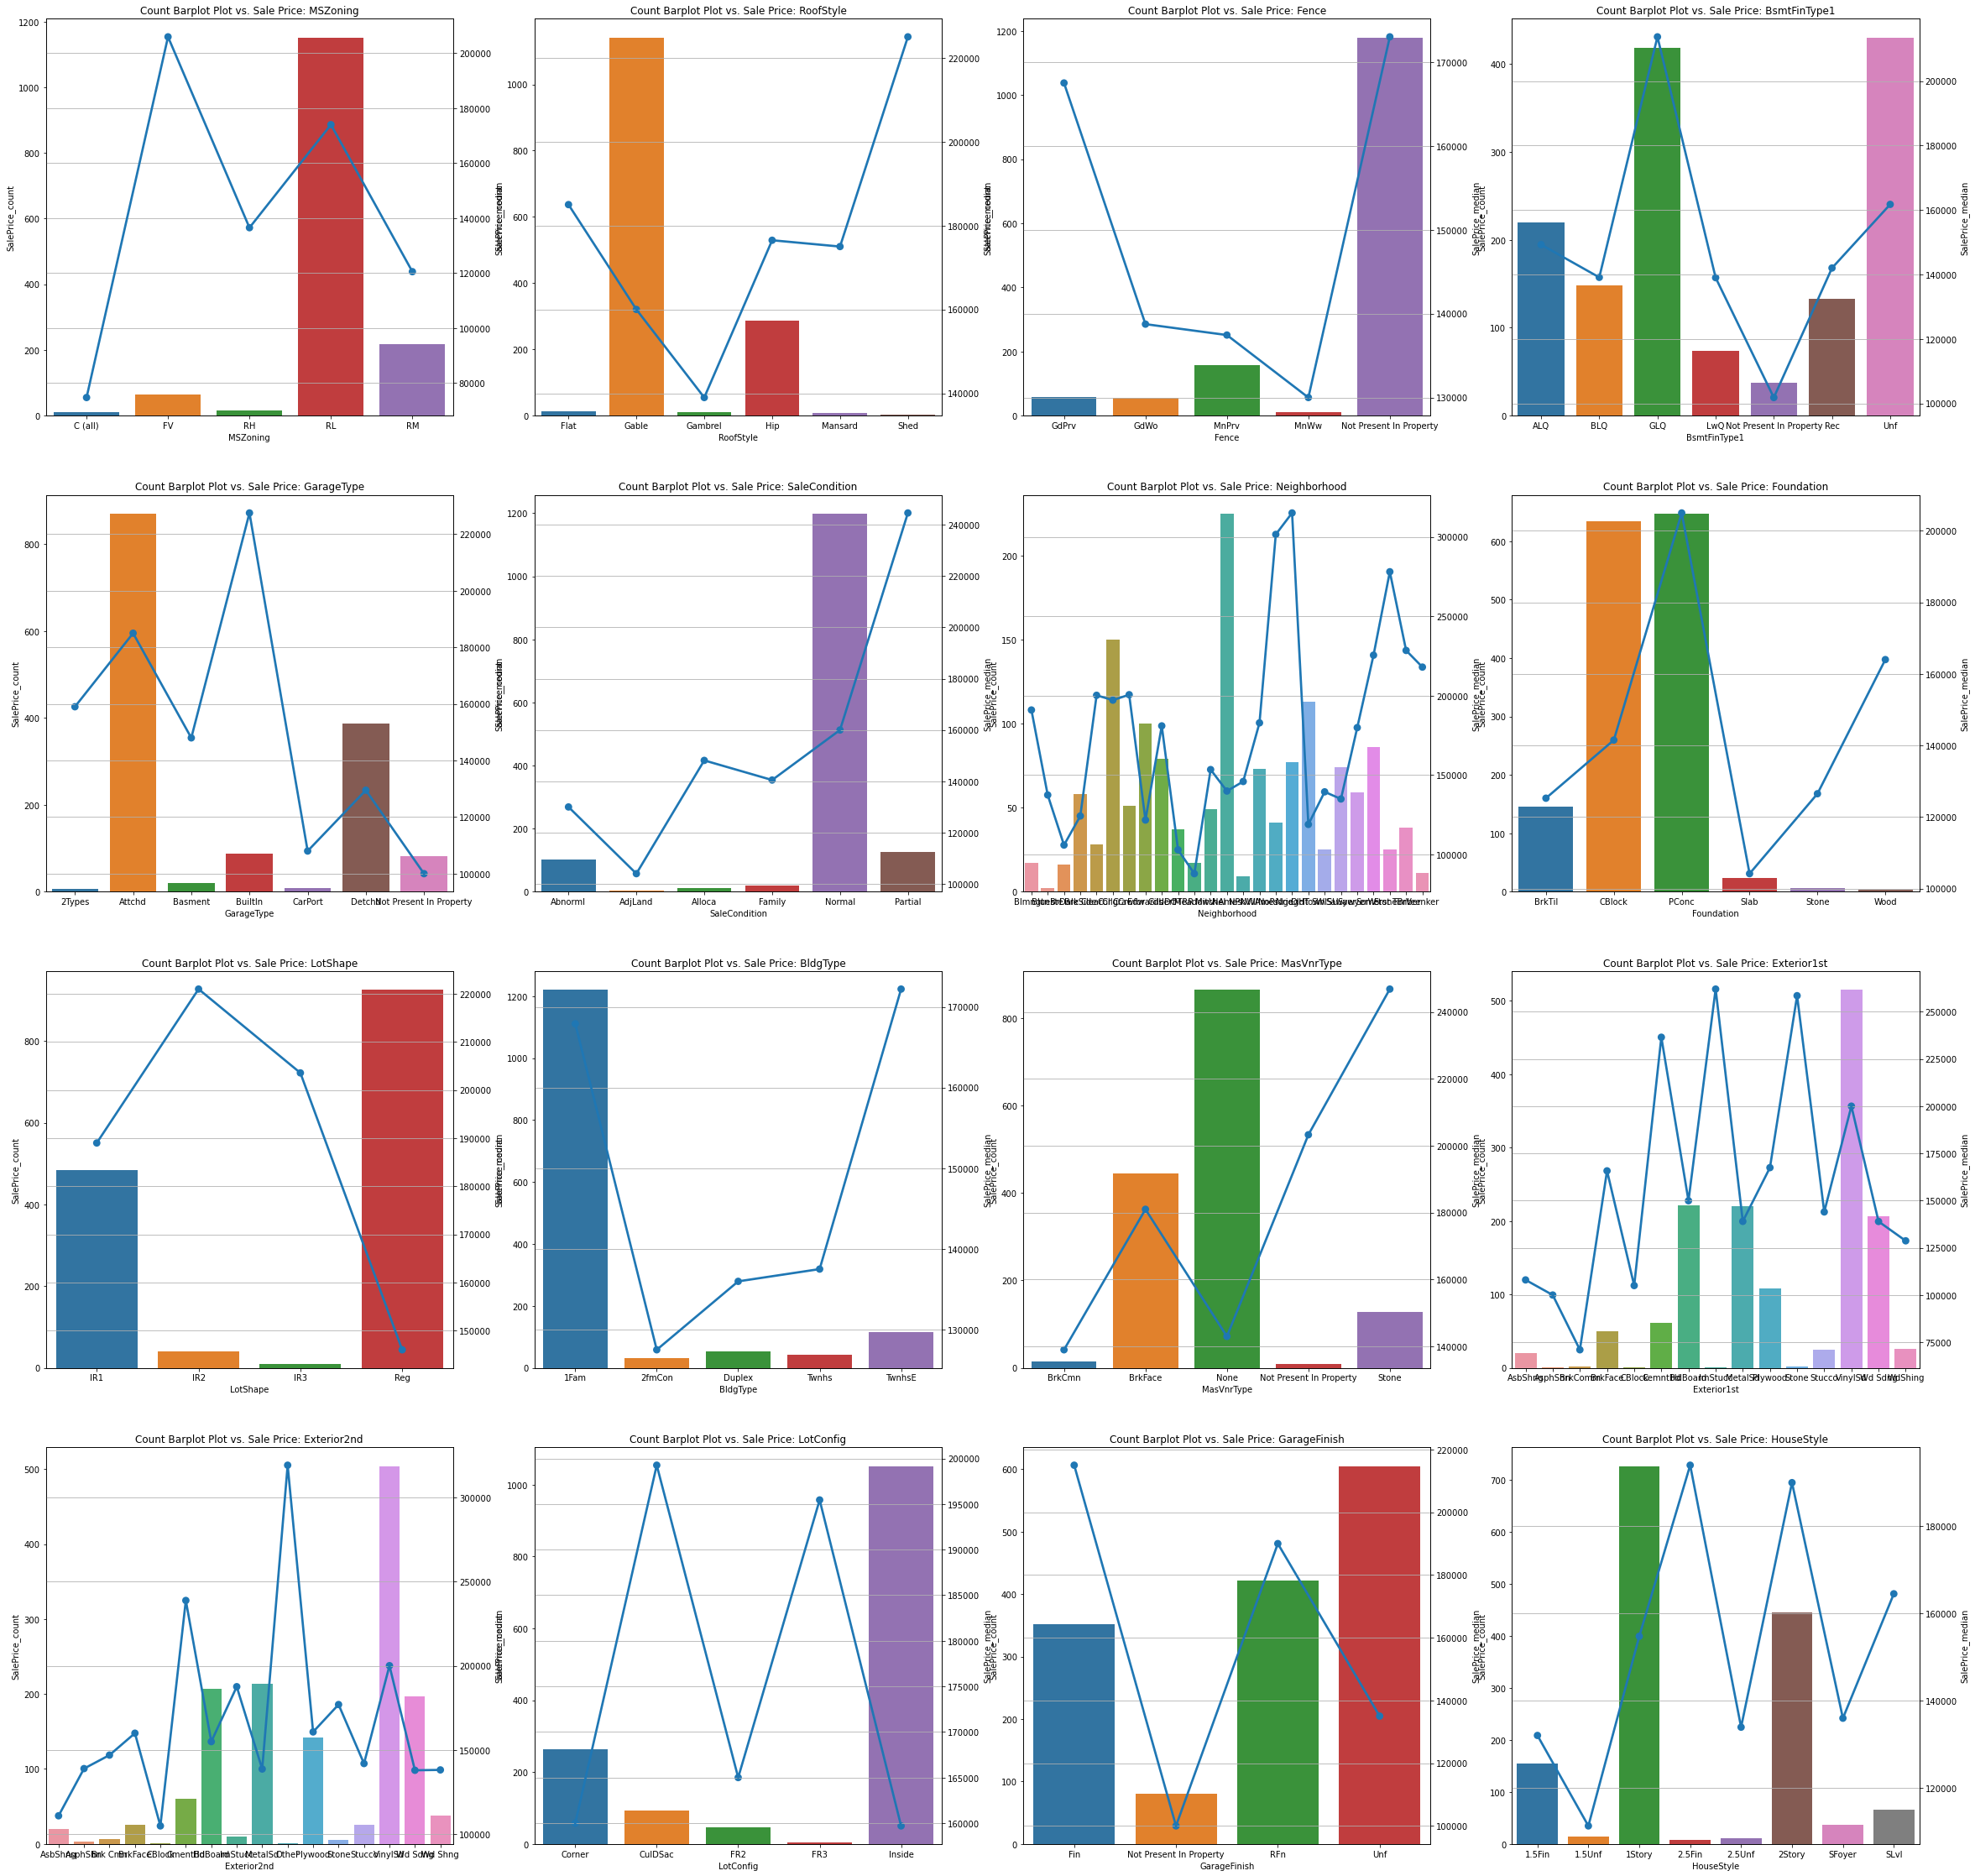

In [44]:
plot_categorical_columns(data, 4, 4, nominal_cols, figsize = (40,40))

### Inference

- The levels in ordinal columns have a gradual upward shift in SalePrice as we move from lower order to higher order. This gives a better confidence to actually represent them as ordinal values (0,1,2,3...)

---
---

### Encoding Categorical Columns
- Dummy Encoding for nominal columns (drop the column with the lowest value count)
- Custom Ordinal Encoding for Ordinal Columns
### Scaling Numeric Columns

- MinMax scaling for all numeric columns
    - The columns OveralQual and OveralCond alongwith other ordinal encoded columns will also be needed to be in the 0-1 range since for all other numeric columns the range will be 0-1

### Dummy Encoding For Nominal Columns

- Instead of using drop_first, we remove the level which has the lowest number of values present in the column [the last value in data[column].value_counts()]

In [46]:
for column in nominal_cols:
    try:
        col_to_drop = data[column].value_counts().index[-1]
        data = pd.get_dummies(data,columns = [column],)
        data = data.drop(columns = [x for x in data.columns if column+"_"+col_to_drop in x],)
    except Exception as e:
        print(e)
        continue

---

### Encoding Ordinal Variables

- Even though sklearn has an inbuilt OrdinalEncoder() class, but that assigns order alphabetically.
- We use a custom encoding scheme to encode the variables using the following logic:
    - The default order is ['Not Present In Property', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    - For a column, if all the levels are present, then the values will be 0,1,2,3,4,5 respectively
    - For a column, if some of the levels are missing, say  ['Not Present In Property', 'Po', 'Fa'] are missing,
      instead of encoding 3,4,5 the encoding will be 1,2,3 [0 assigned only for 'Not Present In Property']

In [48]:
def custom_ordinal_encoding(df, column):
    """Function for encoding ordinal categorical variables
    
    :params:
    
    df: pandas dataframe
    column: (str) column name to encode
    
    :returns:
    
    df: pandas DataFrame: Output dataframe with column encoded
    
    """
    default_encoding_dict =  OrderedDict(dict(zip(['Not Present In Property', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5])))
    output_dict = {}
    prev_val = 9999
    for index, val in enumerate(df.sort_values(by = column, ascending = True)[column].unique()):
        if index == 0:
            output_dict[val] = min(1, default_encoding_dict[val], prev_val+1)
        else:
            output_dict[val] = min(default_encoding_dict[val], prev_val+1)
        prev_val = output_dict[val]
    
    df[column] = df[column].map(output_dict)
    return df


In [49]:
for column in [x for x in ordinal_cols if x != 'BsmtExposure']:
    data = custom_ordinal_encoding(data, column)

Since the categories in 'BsmtExposure' are different, the encoding is done manually

In [50]:
data['BsmtExposure'] = data["BsmtExposure"].map(dict(zip(['Not Present In Property', 'No', 'Mn', 'Av', 'Gd'], [0,1,2,3,4])))

---

## Data Preprocessing Class

In [53]:
class preprocessData():
    """Class For preprocessing data and 
    generating train test split
    
    :Attributes:
    
    - data : pandas DataFrame
    - numeric_cols : list of numeric columns
    - nominal_cols : list of nominal columns
    - ordinal_cols : list of ordinal columns
    
    :Methods:
    
    - drop_outliers : function for outlier removal
    [Instead of Performing 25-75 percentile IQR, it performs 
    05-95th percentile IQR to make sure not too many rows are 
    filtered out and filter rows based on Q1 -1.35IQR to Q3 + 1.35IQR 
    (2 standard deviations for 1.35)]
    
    - preprocess_data : main function for performing further data
    preprocessing and generating train test split
    """
    def __init__(self, data, numeric_cols, nominal_cols, ordinal_cols):
        self.data = data
        self.numeric_cols = [x for x in numeric_cols if x in self.data.columns]
        self.nominal_cols = [x for x in nominal_cols if x in self.data.columns]
        self.ordinal_cols = [x for x in ordinal_cols if x in self.data.columns]
    
    def drop_outliers(self, data):
        list = []
        for col in self.numeric_cols:
            Q1 = data[col].quantile(.05)
            Q3 = data[col].quantile(.95)
            IQR = Q3-Q1
            data =  data[(data[col] >= (Q1-(1.35*IQR))) & (data[col] <= (Q3+(1.35*IQR)))] 
        return data
    def preprocess_data(self, scale_features = True,
                       scaler = 'minmax', 
                       rfe = False,
                       drop_outliers = False,
                       **rfe_kwargs):
        if drop_outliers:
            output_df = self.drop_outliers(self.data)
        else:
            output_df = self.data.copy()
        
        X = output_df.drop(columns = ['SalePrice'])
        y = output_df[['SalePrice']]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
        if scale_features:
            if scaler == 'minmax':
                scaler = MinMaxScaler()
            elif scaler == 'standardscaler':
                scaler = StandardScaler()
            X_train[self.numeric_cols+self.ordinal_cols] = scaler.fit_transform(X_train[self.numeric_cols+self.ordinal_cols])
            X_test[self.numeric_cols+self.ordinal_cols] = scaler.transform(X_test[self.numeric_cols+self.ordinal_cols])
        if rfe:
            X_train = X_train[sorted(X_train.columns)]
            X_test = X_test[X_train.columns]
            model = Lasso(alpha = 1, random_state = 10)
            model.fit(X_train, y_train)
            rfe = RFE(model,**rfe_kwargs)            
            rfe = rfe.fit(X_train, y_train)
            columns_to_filter = X_train.columns[rfe.support_]
            
            X_train = X_train[columns_to_filter]
            X_test = X_test[columns_to_filter]
        return (X_train, y_train), (X_test, y_test)

In [54]:
#Remove the dependent variable from numeric cols
numeric_cols.remove("SalePrice")

## Model Building

In [55]:
class RegressionModel(BaseEstimator, RegressorMixin):
    """
    Custom Regression Class inheritted from Sklearn Base Class for estimators
    ...
    
    :Attributes:
    ----------
    : estimator(None)
        Estimator for performing regression
        
    :Methods:
    ----------
    : fit(X, y = None)
        Fits the specified estimator to the data
    : predict(X, y = None)
        Predicts dependent variable on the data provided
    """
    def __init__(self, estimator = None):
        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)

In [103]:
def run_regression_pipeline(X_train, y_train, X_test, y_test, model_list):
    """Main Function for running the regression model
    
    :param: X_train : pd.DataFrame or np.array
    :param: y_train : pd.DataFrame or np.array
    :param: X_test : pd.DataFrame or np.array
    :param: y_test : pd.DataFrame or np.array
    :param: model_list : list of models to run
    
    :returns:
    results_df: final dataframe containing the output metrics
    of all the model runs for models defined in model_list
    """
    results_df = pd.DataFrame()

    for param_dict in model_list:
        results_dict = {}
        results_dict['estimator'] = str(param_dict['estimator']).split("(")[0]


        model_object = RegressionModel(**param_dict)
        model_object.fit(X_train,y_train)
        y_pred = model_object.predict(X_test)
        try:
            results_dict['Best Alpha'] = model_object.estimator.alpha_
        except:
            results_dict['Best Alpha'] = None
        results_dict['R2 Score Train'] = r2_score(y_train, model_object.predict(X_train))
        results_dict['R2 Score Test'] = r2_score(y_test, model_object.predict(X_test))
        results_dict['MAPE Train (%)'] = np.round(mean_absolute_percentage_error(y_train, model_object.predict(X_train)) * 100, 2)
        results_dict['MAPE Test (%)'] = np.round(mean_absolute_percentage_error(y_test, model_object.predict(X_test)) * 100, 2)

        results_dict['RMSE Train'] = np.sqrt(mean_squared_error(y_train, model_object.predict(X_train)))
        results_dict['RMSE Test'] = np.sqrt(mean_squared_error(y_test, model_object.predict(X_test)))
        results_df = results_df.append(results_dict, ignore_index = True)
        results_df = results_df[['estimator', 'Best Alpha', 'R2 Score Train', 'R2 Score Test', 'MAPE Train (%)', 'MAPE Test (%)', 'RMSE Train', 'RMSE Test']]
    return results_df

---

## Model Definitions

- We define 500 different values of alpha equally spaced between 1e-3 and 10
- We define 3 different types of algorithms to train the data on
    - LassoCV (with 10 fold cross validation) : calculates the optimum alpha from the defined list
    - RidgeCV (withdefault LOOCV) : calculates the optimum alpha from the defined list
    - ElasticNetCV (with 10 fold cross validation and equal weightage on L1 and L2 penalty) : calculates the optimum value of alpha from the defined list

In [59]:
alphas = np.linspace(1e-3, 10, 500)

model_list = [
    {'estimator': LassoCV(alphas = alphas, random_state= 42, cv = KFold(n_splits = 10, random_state = 42, shuffle = True))},
    {'estimator': RidgeCV(alphas = alphas,)},
    {'estimator': ElasticNetCV(l1_ratio = 0.5, alphas = alphas, cv = KFold(n_splits = 10, random_state = 42, shuffle = True), random_state = 42)},
]

---

## Modelling Iterations

- <b>Iteration 1</b>
    - without Using RFE (all columns)
    - without dropping outliers (all rows)
- <b>Iteration 2</b>
    - Without using RFE (all columns)
    - Dropping Outliers (removing some rows)
- <b>Iteration 3</b>
    - Using RFE (getting top columns from RFE)
    - Without Dropping Outliers (all rows)
- <b>Iteration 4</b>
    - Using RFE
    - Dropping Outliers

## Calling the Data Preprocessor Class

In [60]:
preprocessor = preprocessData(data = data, 
                             numeric_cols = numeric_cols,
                             nominal_cols = nominal_cols,
                             ordinal_cols= ordinal_cols)

---

### Iteration 1

In [61]:
(X_train, y_train), (X_test, y_test) = preprocessor.preprocess_data(scale_features = True,
                                                                   scaler = 'minmax',
                                                                   rfe = False,
                                                                   drop_outliers = False)

In [62]:
results_df1 = run_regression_pipeline(X_train, y_train, X_test, y_test, model_list)
results_df1

,estimator,Best Alpha,R2 Score Train,R2 Score Test,MAPE Train (%),MAPE Test (%),RMSE Train,RMSE Test
0,LassoCV,10.000000,0.867201,0.856622,10.64,11.94,29367.738367,28982.229440
1,RidgeCV,6.333032,0.851940,0.858991,10.76,11.88,31009.390923,28741.828896
2,ElasticNetCV,0.021038,0.843580,0.856234,10.93,11.98,31872.787409,29021.422930


---

### Iteration 2

In [63]:
(X_train, y_train), (X_test, y_test) = preprocessor.preprocess_data(scale_features = True,
                                                                   scaler = 'minmax',
                                                                   rfe = False,
                                                                   drop_outliers = True)

In [64]:
results_df2 = run_regression_pipeline(X_train, y_train, X_test, y_test, model_list)
results_df2

,estimator,Best Alpha,R2 Score Train,R2 Score Test,MAPE Train (%),MAPE Test (%),RMSE Train,RMSE Test
0,LassoCV,10.000000,0.906574,0.899109,9.97,10.42,23321.550879,24040.646471
1,RidgeCV,1.443741,0.904259,0.900755,9.77,10.07,23608.640496,23843.796566
2,ElasticNetCV,0.001000,0.906689,0.899809,9.84,10.24,23307.131246,23957.141711


#### Looking at the number of columns Lasso is considering

In [65]:
X_train.shape

(1003, 133)

In [69]:
lasso_coeff = Lasso(alpha = results_df2['Best Alpha'].iloc[0]).fit(X_train, y_train).coef_
lasso_coeff = lasso_coeff[lasso_coeff!=0]

print(f"Features Considered by Lasso: {len(lasso_coeff)}")

Features Considered by Lasso: 120


#### Number of Rows Removed after Outlier Removal

In [70]:
rows_filtered = data.shape[0]- (X_train.shape[0] + X_test.shape[0])

print(f"Total {rows_filtered} rows filtered out of {data.shape[0]} rows")

Total 27 rows filtered out of 1460 rows


### Inference

- By dropping 27 outlier rowx (~2% of total records), the scores improve significantly from Iteration 1

- Model performs good on train and test data (r2 score for lasso 0.89 and for ridge 0.90)
- MAPE on Test Set ~10%
- Model too complex (133 total varaibles with Lasso considering 120 columns, still high)

---

### Iteration 3

In [71]:
rfe_kwargs = {'n_features_to_select': 0.5,}

(X_train, y_train), (X_test, y_test) = preprocessor.preprocess_data(scale_features = True,
                                                                   scaler = 'minmax',
                                                                   rfe = True,
                                                                   drop_outliers = False,
                                                                   **rfe_kwargs)

In [72]:
results_df3 = run_regression_pipeline(X_train, y_train, X_test, y_test, model_list)
results_df3

,estimator,Best Alpha,R2 Score Train,R2 Score Test,MAPE Train (%),MAPE Test (%),RMSE Train,RMSE Test
0,LassoCV,10.000000,0.861360,0.853833,10.86,12.05,30006.717287,29262.750364
1,RidgeCV,4.309186,0.850273,0.859064,11.14,11.81,31183.386491,28734.307593
2,ElasticNetCV,0.021038,0.837175,0.855505,11.43,11.80,32518.811626,29094.897046


### Inference

- Models are simpler than Iteration 1 and 2
    - RFE gives 65 best features (we supply parameter to drop 50% of the total columns)
- Train and Test metrics are worse than results obtained in previous iterations

---

### Iteration 4

In [73]:
rfe_kwargs = {'n_features_to_select': 0.5,}

(X_train, y_train), (X_test, y_test) = preprocessor.preprocess_data(scale_features = True,
                                                                   scaler = 'minmax',
                                                                   rfe = True,
                                                                   drop_outliers = True,
                                                                   **rfe_kwargs)

In [74]:
X_train.shape

(1003, 66)

In [75]:
results_df4 = run_regression_pipeline(X_train, y_train, X_test, y_test, model_list)
results_df4

,estimator,Best Alpha,R2 Score Train,R2 Score Test,MAPE Train (%),MAPE Test (%),RMSE Train,RMSE Test
0,LassoCV,10.000000,0.899163,0.890932,10.46,11.25,24228.920056,24995.911972
1,RidgeCV,1.022942,0.897964,0.893147,10.36,10.96,24372.445047,24740.786824
2,ElasticNetCV,0.001000,0.899102,0.891915,10.39,11.11,24236.191811,24883.064055


In [76]:
lasso_coeff = Lasso(alpha = results_df4['Best Alpha'].iloc[0]).fit(X_train, y_train).coef_
lasso_coeff = lasso_coeff[lasso_coeff!=0]

elasticNet_coeff = ElasticNet(alpha = results_df4['Best Alpha'].iloc[2]).fit(X_train, y_train).coef_
elasticNet_coeff = elasticNet_coeff[elasticNet_coeff!=0]


print(f"Features Considered by Lasso: {len(lasso_coeff)}")
print(f"Features Considered by ElasticNet: {len(elasticNet_coeff)}")

Features Considered by Lasso: 65
Features Considered by ElasticNet: 66


In [77]:
rows_filtered = data.shape[0]- (X_train.shape[0] + X_test.shape[0])

print(f"Total {rows_filtered} rows filtered out of {data.shape[0]} rows")

Total 27 rows filtered out of 1460 rows


### Inference

- Models are much simpler than Iteration  1 and 2
- Removing 27 rows (~2% of total data) improves the train and test scores significantly
- Train and Test score much closer to Iteration 1 and 2 results

## Steps Followed

- Three Different Models tried out
    - Lasso
    - Ridge
    - ElasticNet (with equal weightage on L1 and L2 penalty)
- 500 different alpha values ranging in equal intervals between 1e-3 and 10

## Conclusion

- Ridge, Lasso and ElasticNet perform close to Iteration 2 results
- Ridge performs slightly better on all the three metrics
- Ridge chosen as best model

---
---

## Getting the Predictions From Best Model

In [78]:
best_model = Ridge(alpha =results_df4[results_df4['estimator'] == 'RidgeCV']['Best Alpha'].values[0])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

---

## Residual Analysis

### Three Checks to make sure the model meets the assumptions of a Linear Regression Model

1. Error Terms Normally Distributed
2. Error Terms are independent of each other
3. Homoscedasticity of Error

### Getting the Residuals for all three models

In [79]:
residuals = y_train['SalePrice'].values-best_model.predict(X_train).flatten()


In [80]:
residuals

array([ -1450.10580643, -34972.80306022, -27805.56295765, ...,
        -2611.70051751,  15448.98023808,   7447.34824995])

---

### 1. Checking for Distribution of Residuals

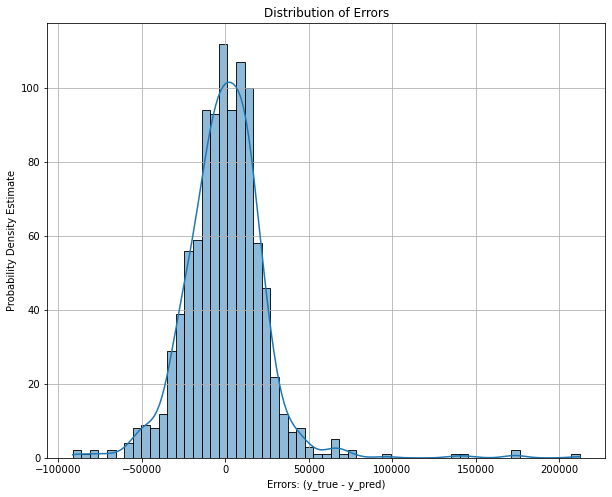

In [81]:
plt.figure(figsize = (10, 8))
sns.histplot(residuals,kde = True)
plt.title('Distribution of Errors')
plt.xlabel('Errors: (y_true - y_pred)')
plt.ylabel("Probability Density Estimate")
plt.grid()

---

### 2. Checking For Independence of Residuals

- Durbin-Watson Test to check for serial correlation of Residuals

In [82]:
from statsmodels.stats.stattools import durbin_watson

In [83]:
print(f"Durbin-Watson Statistic: {durbin_watson(residuals)}")

Durbin-Watson Statistic: 1.988772153369293


---

### 3. Checking For Homoscedasticity of Residuals

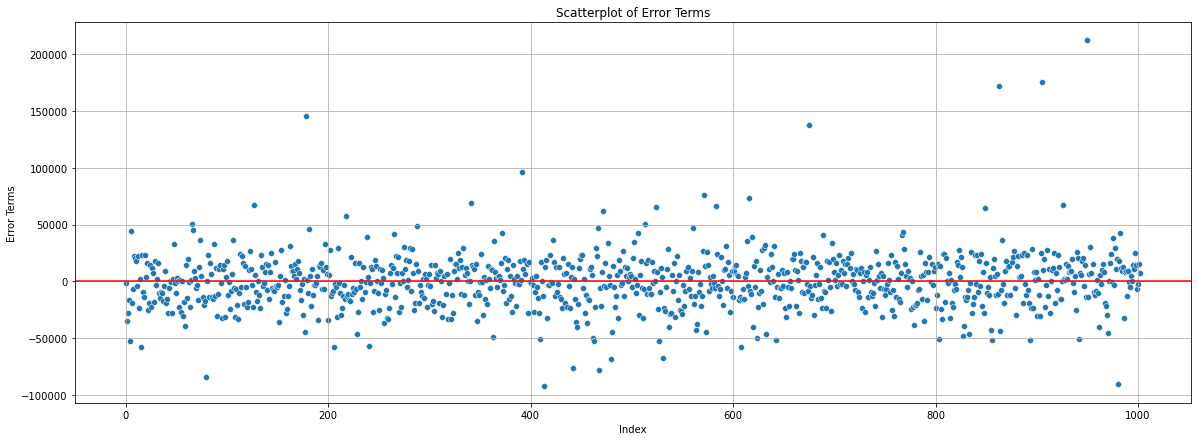

In [84]:
plt.figure(figsize = (20, 7))

sns.scatterplot(x = X_train.reset_index().index.values.tolist(), y = residuals)
plt.axhline(color = 'red')
plt.grid()

plt.title("Scatterplot of Error Terms")
plt.xlabel("Index")
plt.ylabel("Error Terms")
plt.show()

---

## Inference

- The Residuals are visually normally distributed around zero mean
- Residuals do not have serial correlation (durbin watson statistic close to 2)
- Residuals are Homoscedastic (Scattered evenly around the zero line)

---
---

## Feature Importance

Text(0, 0.5, 'Features')

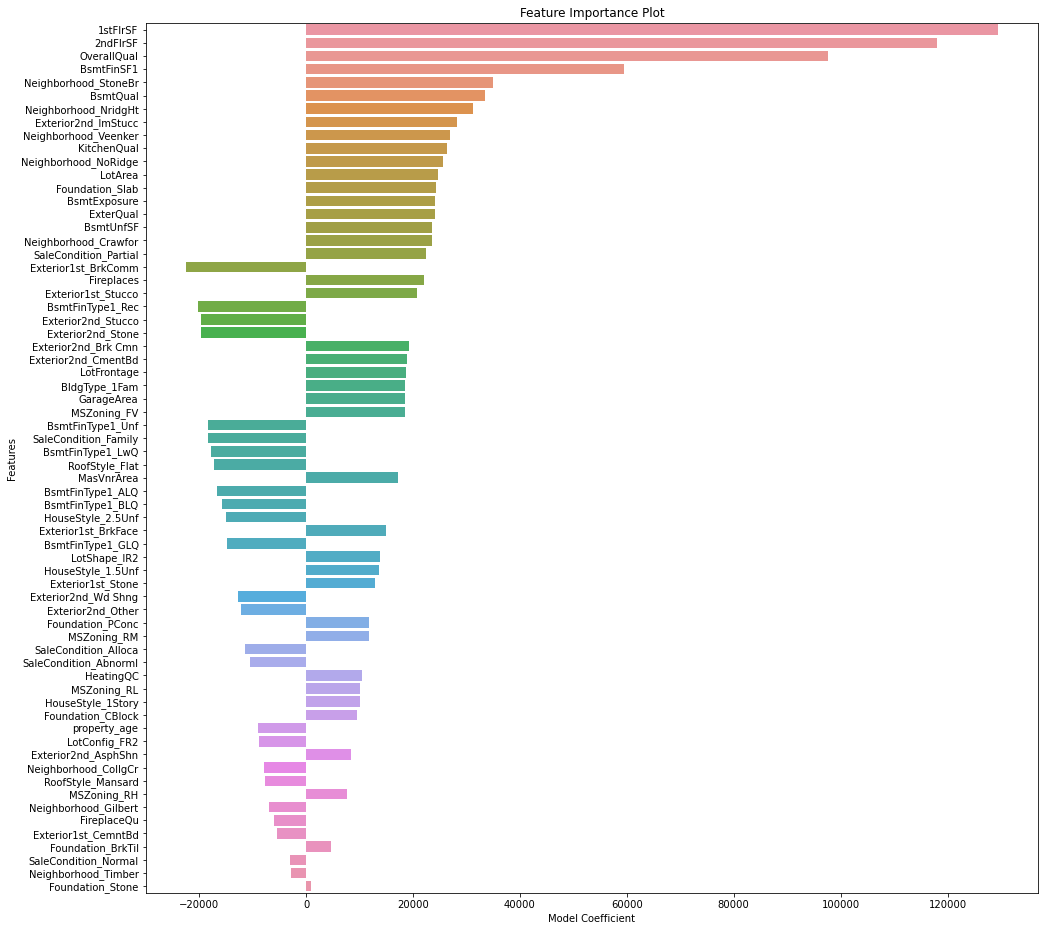

In [85]:
"""
For Lasso: 
Coefficients = best_model.coef_
For other models:
Coefficients = best_model.coef_[0]
"""

plt.figure(figsize = (16,16))
results_dict = OrderedDict(zip(X_train.columns.tolist(), best_model.coef_[0]))
results_dict = OrderedDict(sorted(results_dict.items(), key = lambda x: np.abs(x[1]), reverse = True))
sns.barplot(x = list(results_dict.values()),y = list(results_dict.keys()))
plt.title("Feature Importance Plot")
plt.xlabel("Model Coefficient")
plt.ylabel("Features")

---

# FINAL INFERENCE ON FEATURES

## Top Feautures:

### Top 5 Features
- 1stFlrSF: Sq Feet Area has the highest positive impact on the sale price, higher the sq feet, higher the price
- 2ndFlrSF: Sq. Feet Area of 2nd floor has the second biggest impact on sale price
- OverallQual: Overall Quality of the Property has the third biggest positive impact on sale price
- BasementUnfSF: Basement area has the fourth highest positive impact on sale price
- Neighbourhood_StoneBr : Apartments near Stone Brook neighbourhood tend to be costlier 

---

- Other than that, neighbourhood around other places tend to have an importance
- Baement features like quality, exposure; kitchen related features; Exterior related features have an impact on sale price
- The engineered feature property age has a little but negative impact on sale price (newer properties tend to be costlier)

---
---
---

## Coding For Subjective Queestions

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Steps
- get the training and test data
- run ridge with default best from iteration  4 and ridge with alpha doubled
- run lasso with default best from iteration 4 and lasso with alpha doubled
- compare results and coefficient values

In [86]:
preprocessor = preprocessData(data = data, 
                             numeric_cols = numeric_cols,
                             nominal_cols = nominal_cols,
                             ordinal_cols= ordinal_cols)
rfe_kwargs = {'n_features_to_select': 0.5,}

(X_train, y_train), (X_test, y_test) = preprocessor.preprocess_data(scale_features = True,
                                                                   scaler = 'minmax',
                                                                   rfe = True,
                                                                   drop_outliers = True,
                                                                   **rfe_kwargs)

In [87]:
X_train.shape

(1003, 66)

In [88]:
model_ridge = Ridge(alpha = 2.045884)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

In [89]:
#getting the metrics

print(f"R2 Score : {r2_score(y_test, y_pred_ridge)}")
print(f"RMSE Score : {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"MAPE : {mean_absolute_percentage_error(y_test, y_pred_ridge)}")

R2 Score : 0.8939241162161348
RMSE Score : 24650.68213542124
MAPE : 0.1077944985945477


In [90]:
model_lasso = Lasso(alpha = 20)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

#getting the metrics

print(f"R2 Score : {r2_score(y_test, y_pred_lasso)}")
print(f"RMSE Score : {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"MAPE : {mean_absolute_percentage_error(y_test, y_pred_lasso)}")

R2 Score : 0.8920732772991518
RMSE Score : 24864.807820920083
MAPE : 0.1116469811900192


In [91]:
model_lasso.coef_

array([156272.50655852, 128301.1210791 ,  18983.73001199,  24377.14924471,
        53178.16807764, -10799.92286627, -10294.48792268,  -9567.5969995 ,
       -13954.23166267, -15146.62953327, -12556.31525468,  30499.41197815,
        13362.41254362,  21005.50778886, -23205.74659186,  12868.9559104 ,
           -0.        ,      0.        ,  20656.41420342,   1432.52048302,
        18555.04797635,  13456.55038196,  28380.74038851,  -5678.81450174,
       -17704.74106814, -19350.26259329, -12796.74180715,  -5811.45025761,
        17651.36720649,    395.33773364,   6005.07882785,   7767.39825739,
        21752.31332343,  -1217.32032087,  13265.81530679,   9837.4439604 ,
        15309.39409504,  12160.85308799, -17355.26241498,  25118.92604757,
        20500.55838497,  -8056.23498843,  15384.93713968,  12675.60871458,
        13780.1619721 ,      0.        ,   4271.21289081,   6292.59722149,
        14728.03454572,  -6415.25971649,  23330.85238915,  -4770.33107471,
        25094.10128742,  

In [93]:
#dict for ridge
results_dict_ridge = OrderedDict(zip(X_train.columns.tolist(), model_ridge.coef_[0]))
results_dict_ridge = OrderedDict(sorted(results_dict_ridge.items(), key = lambda x: np.abs(x[1]), reverse = True))

df_res_q1 = pd.DataFrame()
for (k1, v1), (k2, v2) in zip(results_dict.items(), results_dict_ridge.items()):
    dict_ = {'Feature_Ridge': k1,
            'Coefficient_Ridge': v1,
             'Feature_Ridge_2x': k2,
            'Coefficient_Ridge_2x': v2,
            }
    df_res_q1 = df_res_q1.append(dict_, ignore_index = True)

df_res_q1[['Feature_Ridge', 'Coefficient_Ridge', 'Feature_Ridge_2x', 'Coefficient_Ridge_2x']].head()

,Feature_Ridge,Coefficient_Ridge,Feature_Ridge_2x,Coefficient_Ridge_2x
0,1stFlrSF,129396.477619,1stFlrSF,115787.340649
1,2ndFlrSF,117980.661449,2ndFlrSF,108022.642752
2,OverallQual,97659.869722,OverallQual,92131.006593
3,BsmtFinSF1,59409.705967,BsmtFinSF1,57791.302603
4,Neighborhood_StoneBr,34869.068795,Neighborhood_StoneBr,33693.648512


In [94]:
#getting the coefficients for lasso

#first for the normal model with alpha = 10
model_lasso_default = Lasso(alpha = 10)
model_lasso_default.fit(X_train, y_train)
y_pred_lasso1 = model_lasso_default.predict(X_test)

results_dict_lasso_default = OrderedDict(zip(X_train.columns.tolist(), model_lasso_default.coef_))
results_dict_lasso_default = OrderedDict(sorted(results_dict_lasso_default.items(), key = lambda x: np.abs(x[1]), reverse = True))


model_lasso_2x = Lasso(alpha = 20)
model_lasso_2x.fit(X_train, y_train)
y_pred_lasso2 = model_lasso_2x.predict(X_test)

results_dict_lasso_2x = OrderedDict(zip(X_train.columns.tolist(), model_lasso_2x.coef_))
results_dict_lasso_2x = OrderedDict(sorted(results_dict_lasso_2x.items(), key = lambda x: np.abs(x[1]), reverse = True))

df_res_q1_lasso = pd.DataFrame()
for (k1, v1), (k2, v2) in zip(results_dict_lasso_default.items(), results_dict_lasso_2x.items()):
    dict_ = {'Feature_Lasso': k1,
            'Coefficient_Lasso': v1,
             'Feature_Lasso_2x': k2,
            'Coefficient_Lasso_2x': v2,
            }
    df_res_q1_lasso = df_res_q1_lasso.append(dict_, ignore_index = True)

df_res_q1_lasso[['Feature_Lasso', 'Coefficient_Lasso', 'Feature_Lasso_2x', 'Coefficient_Lasso_2x']].head()

,Feature_Lasso,Coefficient_Lasso,Feature_Lasso_2x,Coefficient_Lasso_2x
0,1stFlrSF,152737.901941,1stFlrSF,156272.506559
1,2ndFlrSF,129979.539320,2ndFlrSF,128301.121079
2,OverallQual,104567.528135,OverallQual,105798.853696
3,BsmtFinSF1,57248.975659,BsmtFinSF1,53178.168078
4,Exterior1st_BrkComm,-37422.594500,Neighborhood_StoneBr,34267.530391


---

### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [96]:
#top_5_features

top_5_features = list(results_dict.keys())[:5]
top_5_features

['1stFlrSF', '2ndFlrSF', 'OverallQual', 'BsmtFinSF1', 'Neighborhood_StoneBr']

### Steps
- remove features from main data
- perform feature selection again
- perform modelling again

In [97]:
data_q3 = data.drop(columns = top_5_features)

preprocessor = preprocessData(data = data_q3, 
                             numeric_cols = numeric_cols,
                             nominal_cols = nominal_cols,
                             ordinal_cols= ordinal_cols)

rfe_kwargs = {'n_features_to_select': 0.5,}
(X_train, y_train), (X_test, y_test) = preprocessor.preprocess_data(scale_features = True,
                                                                   scaler = 'minmax',
                                                                   rfe = True,
                                                                   drop_outliers = True,
                                                                   **rfe_kwargs)

In [100]:
X_train.shape

(1003, 64)

In [101]:
results_q3 = run_regression_pipeline(X_train, y_train, X_test, y_test, model_list)
results_q3

,estimator,Best Alpha,R2 Score Train,R2 Score Test,MAPE Train (%),MAPE Test (%),RMSE Train,RMSE Test
0,LassoCV,10.000000,0.841484,0.823183,12.93,13.71,30378.024989,31826.036346
1,RidgeCV,0.702333,0.840076,0.824142,12.96,13.73,30512.677685,31739.644729
2,ElasticNetCV,0.001000,0.840820,0.823940,12.94,13.73,30441.601305,31757.849502


Text(0, 0.5, 'Features')

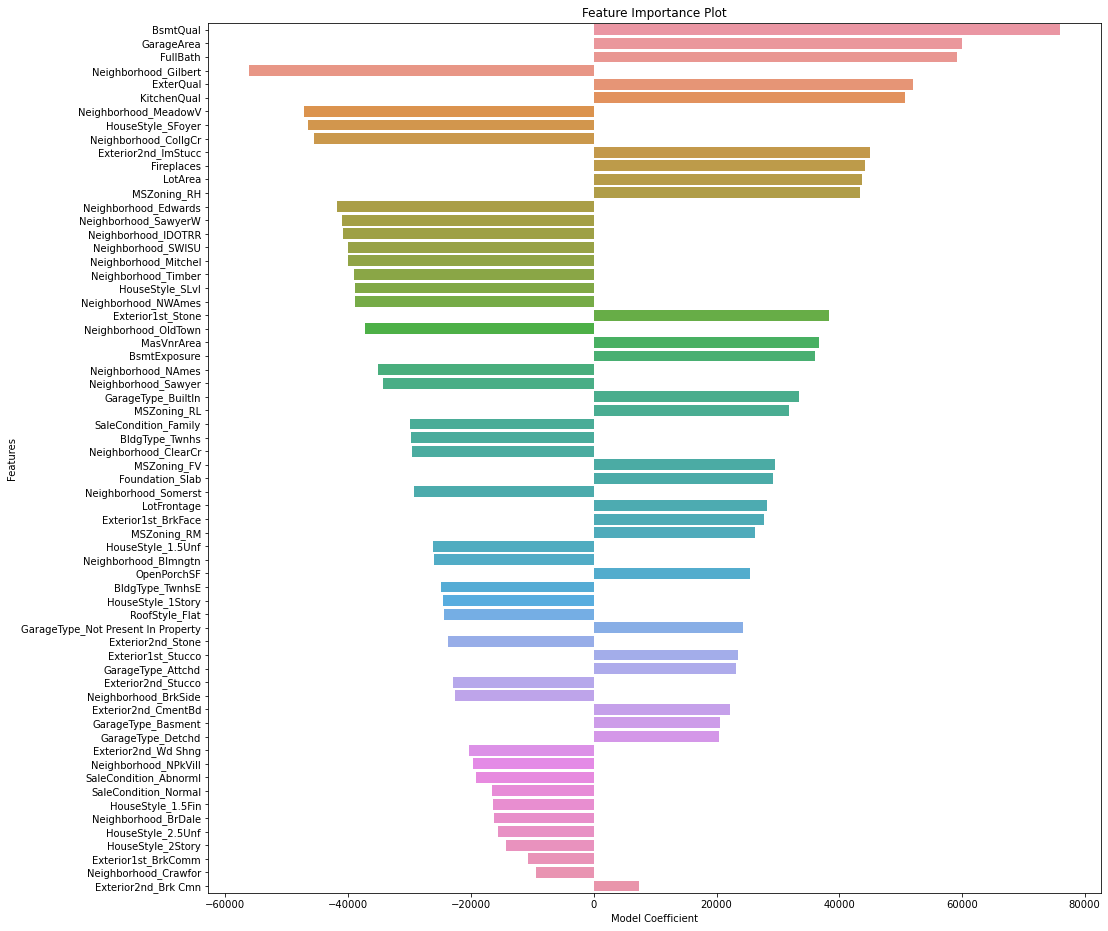

In [102]:
best_model = Ridge(alpha =results_q3[results_q3['estimator'] == 'RidgeCV']['Best Alpha'].values[0])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

plt.figure(figsize = (16,16))
results_dict = OrderedDict(zip(X_train.columns.tolist(), best_model.coef_[0]))
results_dict = OrderedDict(sorted(results_dict.items(), key = lambda x: np.abs(x[1]), reverse = True))
sns.barplot(x = list(results_dict.values()),y = list(results_dict.keys()))
#            palette = 'crest')
plt.title("Feature Importance Plot")
plt.xlabel("Model Coefficient")
plt.ylabel("Features")